In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

/Users/sanzhar/.virtualenvs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step
(50000, 28, 28) (50000,)


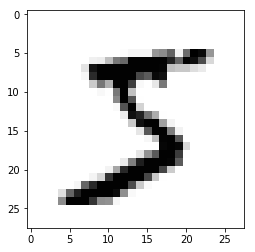

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1) 
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [4]:
y_train = np.eye(10)[y_train]
y_val = np.eye(10)[y_val]
y_test = np.eye(10)[y_test]

## Model NN

In [5]:
X = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

In [6]:
w1 = tf.get_variable("w1", [784, 300], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1", [300], initializer=tf.zeros_initializer())
w2 = tf.get_variable("w2", [300, 250], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", [250], initializer=tf.zeros_initializer())
w3 = tf.get_variable("w3", [250, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", [10], initializer=tf.zeros_initializer())

Instructions for updating:
Use the retry module or similar alternatives.


In [7]:
keep_prob = tf.placeholder(tf.float32)

In [8]:
z1 = tf.add(tf.matmul(X, w1), b1)
a1 = tf.nn.relu(z1)
a1 = tf.nn.dropout(a1, keep_prob)

z2 = tf.add(tf.matmul(a1, w2), b2)
a2 = tf.nn.relu(z2)
a2 = tf.nn.dropout(a2, keep_prob)

z3 = tf.add(tf.matmul(a2, w3), b3)
a3 = tf.nn.sigmoid(z3)

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=a3))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [10]:
n_epoch = 50
batch_size = 500

optimizer = tf.train.AdamOptimizer(learning_rate=0.0006).minimize(cost)

In [11]:
%%time
trainCost = []
valCost = []

train_acc = []
test_acc = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for ep in range(n_epoch):
        avg_cost = 0
        for i in range(0, X_train.shape[0], batch_size):
            sess.run([optimizer], feed_dict={X: X_train[i:i+batch_size], 
                                                y: y_train[i:i+batch_size],
                                                keep_prob: 0.75})

        cost_train = sess.run(cost, feed_dict={X: X_train, y: y_train, keep_prob: 1})
        cost_val = sess.run(cost, feed_dict={X: X_test, y: y_test, keep_prob: 1})
        trainCost.append(cost_train)
        valCost.append(cost_val)
        
        correct_prediction = tf.equal(tf.argmax(z3, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        train_accuracy = accuracy.eval({X: X_train, y:y_train, keep_prob: 1})
        test_accuracy = accuracy.eval({X: X_test, y:y_test, keep_prob: 1})
        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)
        
        if(ep%10 == 0):
            print(ep)
            print('Train loss = ', cost_train)
            print('Test loss = ', cost_val)

0
Train loss =  1.5712243
Test loss =  1.565206
10
Train loss =  1.4824768
Test loss =  1.4878443
20
Train loss =  1.4715781
Test loss =  1.4802074
30
Train loss =  1.4673846
Test loss =  1.4782512
40
Train loss =  1.4652115
Test loss =  1.4777869
CPU times: user 7min 43s, sys: 46.1 s, total: 8min 30s
Wall time: 2min 58s


In [15]:
print("Train acc = ", train_acc[-1])
print("Test acc = ", test_acc[-1])

Train acc =  0.9972
Test acc =  0.9838


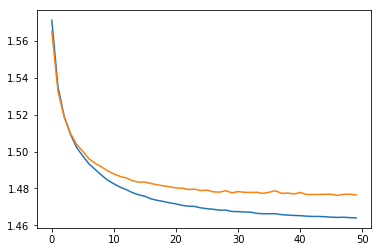

In [16]:
plt.plot(range(n_epoch), trainCost)
plt.plot(range(n_epoch), valCost)
plt.show()

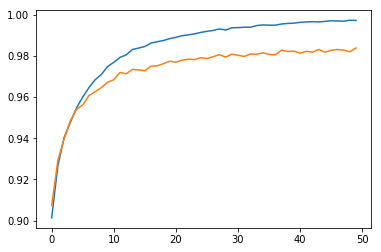

In [17]:
plt.plot(range(n_epoch), train_acc)
plt.plot(range(n_epoch), test_acc)
plt.show()